In [105]:
import torch

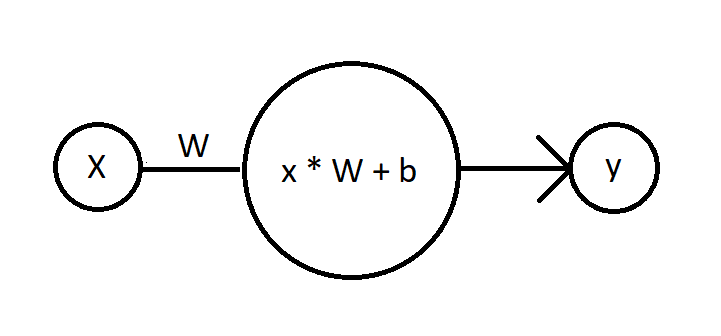
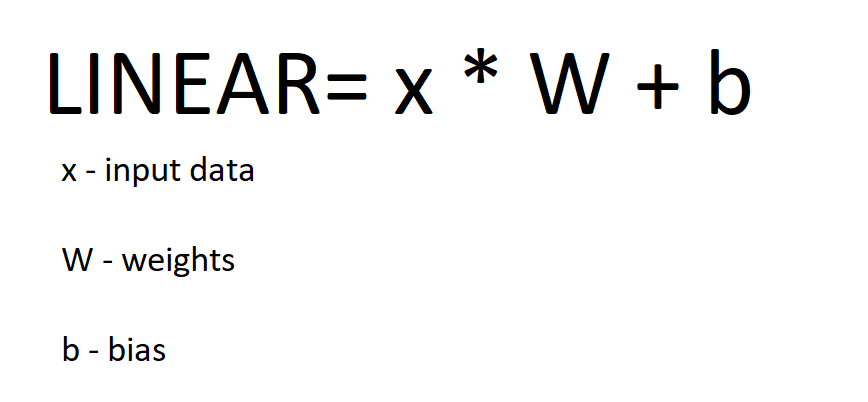

# CREATE DATA 

In [106]:
x = torch.tensor([[2], [3], [7], [1], [13], [5]], dtype=torch.float)
y = torch.tensor([[4], [5], [9], [3], [15], [7]], dtype=torch.float) # y = x + 2


# CREATE LINEAR LAYER

In [107]:
def LINEAR(x, weights, bias):
    out = x * weights + bias
    return out

# CREATE ARHITECTURE MODEL

In [108]:
class Model():
    def __init__(self):
        self.weights = torch.randn(1, requires_grad=True, dtype=torch.float)
        self.bias = torch.randn(1, requires_grad=True, dtype=torch.float)
        self.x = None
    
    def net(self, x):
        self.x = x
        out = LINEAR(x, self.weights, self.bias)
        return out

model = Model()

# CREATE LOSS FN

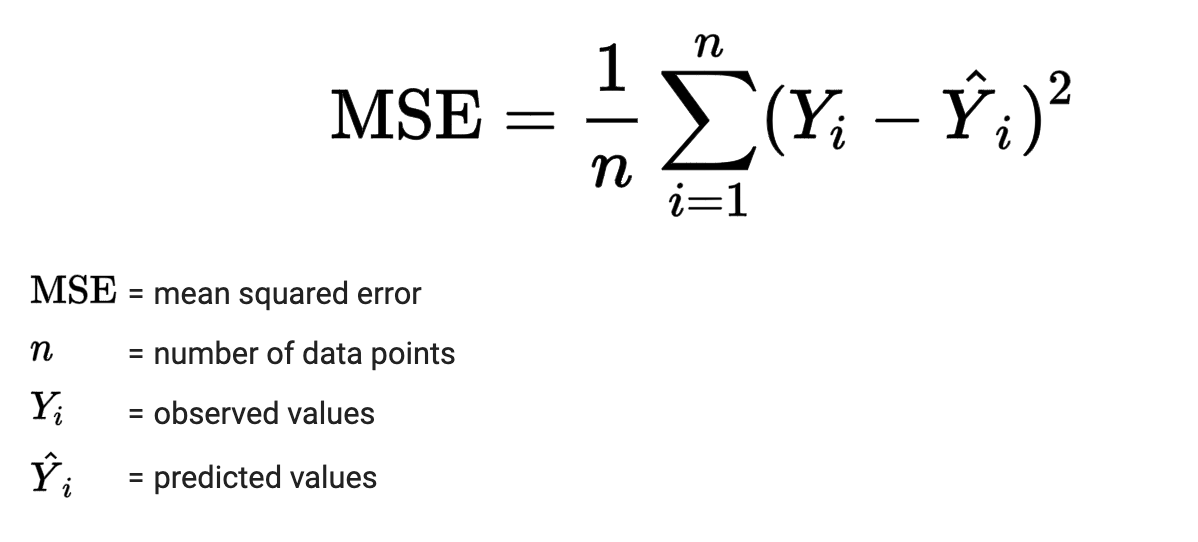

In [109]:
#MSE
def loss_fn(y, model_pred):
    return ((y - model_pred)**2).mean()

# CREATE OPTIM STEP

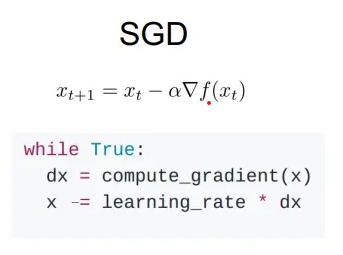

производная по b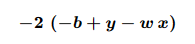

производная по W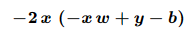

In [112]:
#optim step
def optim(weights_grad, bias_grad):
    with torch.no_grad():
        model.weights -= lr * weights_grad
        model.bias -= lr * bias_grad

In [113]:
epoсhs = 100
lr = 0.01

for epoсh in range(epoсhs):    
    
    model_pred = model.net(x)
    print(f'model_out: {model_pred}\n')
    
    #MSE -> sum((Y_true - Y_pred)**2) / Ny
    loss = loss_fn(y, model_pred)
    print(f'loss: {loss}\n')
    #----------------------------------------------------
    loss.backward()
    #производная по W mean(-2 * x * (-x * W + y - b))
    print(f'grad_w: {model.weights.grad}\n')
    #производная по b mean(-2 * (-b + y - w * x))
    print(f'grad_b: {model.bias.grad}\n')
    
    #optim step
    optim(model.weights.grad, model.bias.grad)
        
    model.weights.grad.zero_()
    model.bias.grad.zero_()
    print('------------------------\n')
    
print(f'Y_pred: {model_pred}\n')
print(f'Y_true: {y}\n')

model_out: tensor([[-1.6076],
        [-2.3376],
        [-5.2580],
        [-0.8775],
        [-9.6384],
        [-3.7978]], grad_fn=<AddBackward0>)

loss: 171.20909118652344

grad_w: tensor([-340.7998])

grad_b: tensor([-44.3446])

------------------------

model_out: tensor([[ 5.6519],
        [ 8.3298],
        [19.0415],
        [ 2.9740],
        [35.1090],
        [13.6856]], grad_fn=<AddBackward0>)

loss: 93.9529800415039

grad_w: tensor([126.1342])

grad_b: tensor([13.9306])

------------------------

model_out: tensor([[ 2.9899],
        [ 4.4065],
        [10.0728],
        [ 1.5733],
        [18.5723],
        [ 7.2396]], grad_fn=<AddBackward0>)

loss: 2.896221399307251

grad_w: tensor([16.6397])

grad_b: tensor([0.6181])

------------------------

model_out: tensor([[ 2.6509],
        [ 3.9011],
        [ 8.9018],
        [ 1.4007],
        [16.4029],
        [ 6.4015]], grad_fn=<AddBackward0>)

loss: 1.3202298879623413

grad_w: tensor([2.3212])

grad_b: tensor([-1.1137])


In [114]:
pred = model.net(torch.tensor(9, dtype=torch.float))
print(f'pred:{9} = {pred}')

pred:9 = tensor([11.0855], grad_fn=<AddBackward0>)
